<a href="https://github.com/victoresende19">![Foo](https://www.jornaldevinhedo.com.br/wp-content/uploads/2022/07/1e45483b-4bba-4b0c-b885-de7715cf8afd.jpeg)</a>

<h2 style="text-align:center">Processamento de Linguagem Natural: Plano de Governo Lula (PT) <h2\>
<p style="text-align:center;font-size:13px;"></p>
   
<h2 style="text-align:center">Victor Augusto Souza Resende<h2\>
<p style="text-align:center;font-size:13px;">Autor</p>

## Sumário

- [1. Contexto](#1) <br>
    
- [2. Instaçaões e Bibliotecas](#2) <br>
    
- [3. Leitura do arquivo PDF](#3) <br>
    
- [4. Exploração do PDF](#4) <br>
    
- [5. Junção de todo contéudo](#5) <br>
    
- [6. Pipeline](#6) <br>
    * [6.1 - Lower case](#61)<br>
    * [6.2 - Retirar pontuação](#62)<br>
    * [6.3 - Tokenização](#63)<br>
    * [6.4 - Stop words](#64)<br>
        
- [7. Gráficos](#7) <br>
    * [7.1 - Gráfico de frequência dos tokens limpos ](#7)<br>
    * [7.2 - Nuvem de palavras](#7)<br>

## Contexto  <a id="1"></a>

A análise a seguir tem como objetivo aplicar técnicas de Processamento de Linguagem Natural sobre o plano de governo disponibilizado pelos candidatos da eleição presidencial do Brasil em 2022. 

Portanto, o notebook utilizou os dados referentes ao texto disponibilizado pelo candidato Luiz Inácio Lula do partido PT, do qual pode ser visualizado clicando <a href="https://www.pt.org.br/wp-content/uploads/2018/08/plano-lula-de-governo_2018-08-14-texto-registrado-3.pdf">aqui</a>.

## Instações e bibliotecas  <a id="2"></a>

In [1]:
!pip install pdfplumber -q
!pip install wordcloud -q
!pip install Pillow -q

In [2]:
import pdfplumber
import re
import nltk
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Leitura do arquivo PDF <a id="3"></a>

In [3]:
mdb = 'PlanosPDF/PLANOPT.pdf'

In [4]:
pdf = pdfplumber.open(mdb)

## Exploração do PDF <a id="4"></a>

In [5]:
# Metadados
pdf.metadata

{'Author': 'Gilberto Carvalho',
 'Creator': 'Microsoft® Word 2013',
 'CreationDate': "D:20180815154952-03'00'",
 'ModDate': "D:20180815154952-03'00'",
 'Producer': 'Microsoft® Word 2013'}

In [6]:
# Quantidade de páginas
len(pdf.pages)

62

In [7]:
# Página 1
pdf.pages[0].extract_text()

' \nPLANO LULA \nDE GOVERNO \n2019-2022 \n \nColigação O POVO FELIZ DE NOVO \nPT/PCdoB/PROS\n1 '

In [8]:
# Página 3
print(pdf.pages[4].extract_text())

 
O BRASIL FELIZ DE NOVO 
 
Não adianta tentar parar as minhas ideias. 
Elas já estão pairando no ar, e não tem com prendê-las. 
 
Luiz Inácio LULA da Silva 
(Sindicato dos Metalúrgicos do ABC, em 7 de abril de 2018) 
 
 
 
 
Lula é uma ideia e agora um programa. Sua candidatura lidera hoje uma ampla frente política e social 
capaz de tirar o Brasil da encruzilhada histórica em que nos encontramos. Nunca tantos direitos foram 
cassados, violados e massacrados em um período tão curto da história brasileira.  Ou o país constrói o seu 
caminho para a democracia, desenvolvimento e a justiça social, ou afundará no rumo imposto pelo ilegítimo 
governo Temer e do PSDB e sua maioria parlamentar, com apoio de sectores da mídia e do empresariado.  
 
A perseguição judicial a Lula com amplo respaldo midiático busca justamente interditar essa alternativa 
democrática e coloca na mobilização social em defesa da democracia e do direito de Lula ser candidato a 
centralidade da luta política no país. 

## Junção de todo contéudo <a id="5"></a>
Essa etapa juntará todo o texto extraído em uma única string.



In [9]:
conteudo = ''
for pagina in pdf.pages:
    conteudo = conteudo + pagina.extract_text()

# cinco primeiros
print(conteudo[0:5])

 
PLA


## Pipeline: <a id="6"></a>

1.   Lower case
2.   Retirar pontuação
3.   Tokenização
4.   Stop words


### 1 - Lower case <a id="61"></a>

In [10]:
conteudo = conteudo.lower()
print(conteudo)

 
plano lula 
de governo 
2019-2022 
 
coligação o povo feliz de novo 
pt/pcdob/pros
1  
plano lula 
de governo 
2019-2022 
 
 
 
coligação o povo feliz de novo 
 
pt/pcdob/pros
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
15 de agosto de 2018 
sumário 
 
o brasil feliz de novo ........................................................................................................................ 5 
1. soberania nacional e popular na refundação democrática do brasil . 10 
1.1 soberania nacional e política externa altiva e ativa .................................................................................... 10 
1.1.1 integração regional como base para a inserção do brasil no mundo .............................................................................................. 11 
1.1.2 integração global, relações com a áfrica e os brics .......................................................................................................... 11 
1.1.3 defesa e soberania nacion

### 2 - Retirar pontuação <a id="62"></a>

In [11]:
# Retirando caracteres especiais
conteudo = re.sub(r'[^\w\s]+', ' ', conteudo)

# Retirando "número_" pois ocorre demasiadamente
conteudo = re.sub(r'\d+_', ' ', conteudo)

print(conteudo)

 
plano lula 
de governo 
2019 2022 
 
coligação o povo feliz de novo 
pt pcdob pros
1  
plano lula 
de governo 
2019 2022 
 
 
 
coligação o povo feliz de novo 
 
pt pcdob pros
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
15 de agosto de 2018 
sumário 
 
o brasil feliz de novo   5 
1  soberania nacional e popular na refundação democrática do brasil   10 
1 1 soberania nacional e política externa altiva e ativa   10 
1 1 1 integração regional como base para a inserção do brasil no mundo   11 
1 1 2 integração global  relações com a áfrica e os brics   11 
1 1 3 defesa e soberania nacional   12 
1 2  recuperar e fortalecer a soberania popular   12 
1 2 1 revogar o legado do arbítrio   12 
1 2 2 promover uma ampla reforma política com participação popular   13 
1 2 3 promover a reforma do estado   13 
1 2 4 promover a reforma do sistema de justiça   15 
1 2 5 promover o equilíbrio e justiça previdenciária   16 
1 3 promover a democracia  o pluralismo e a diversidade na mídia   16 

### 3 - Tokenização <a id="63"></a>


In [12]:
conteudo = re.findall(r'\w+', conteudo)

# cinco primeiros
print(conteudo[0:5])

['plano', 'lula', 'de', 'governo', '2019']


### 4 - Stop words <a id="64"></a>


In [13]:
stopwords = nltk.corpus.stopwords.words('portuguese')
conteudo_limpo = []

for item in conteudo:
    if (item not in stopwords) and (len(item) > 1):
        conteudo_limpo.append(item)

# cinco primeiros
print(conteudo_limpo[0:5])

['plano', 'lula', 'governo', '2019', '2022']


In [14]:
# Após a limpeza, os 30 tokens mais comuns

stats_tokens_limpos = Counter(conteudo_limpo)
conteudo_30 = stats_tokens_limpos.most_common(30)
conteudo_30

[('lula', 219),
 ('governo', 185),
 ('nacional', 149),
 ('políticas', 125),
 ('política', 119),
 ('desenvolvimento', 114),
 ('brasil', 107),
 ('social', 87),
 ('direitos', 86),
 ('novo', 84),
 ('sistema', 82),
 ('além', 76),
 ('país', 74),
 ('educação', 70),
 ('vai', 69),
 ('saúde', 65),
 ('reforma', 62),
 ('investimentos', 59),
 ('federal', 55),
 ('sociais', 52),
 ('transição', 52),
 ('bem', 52),
 ('programa', 52),
 ('sociedade', 49),
 ('ecológica', 48),
 ('serviços', 47),
 ('recursos', 46),
 ('plano', 45),
 ('promover', 45),
 ('gestão', 45)]

## Gráficos <a id="7"></a>

1.   Gráfico de frequência dos tokens limpos
2.   Nuvem de palavras

In [15]:
df = pd.DataFrame(conteudo_30, columns = ['Palavra', 'Frequencia'])
df.head()

,Palavra,Frequencia
0,lula,219
1,governo,185
2,nacional,149
3,políticas,125
4,política,119


### 1 - Gráfico de frequência dos tokens limpos <a id="71"></a>

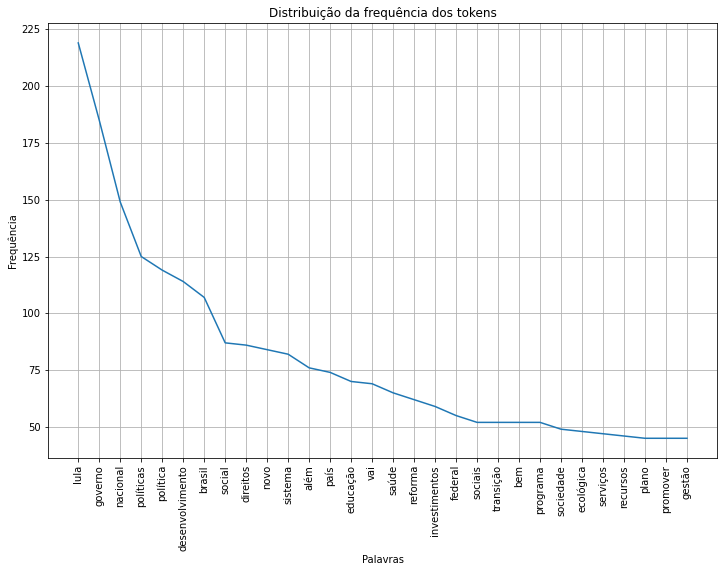

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df.Palavra, df.Frequencia)

ax.set(xlabel='Palavras', ylabel='Frequência', title='Distribuição da frequência dos tokens')
plt.xticks(rotation=90)
ax.grid()

plt.show()

### 2 - Nuvem de palavras <a id="72"></a>

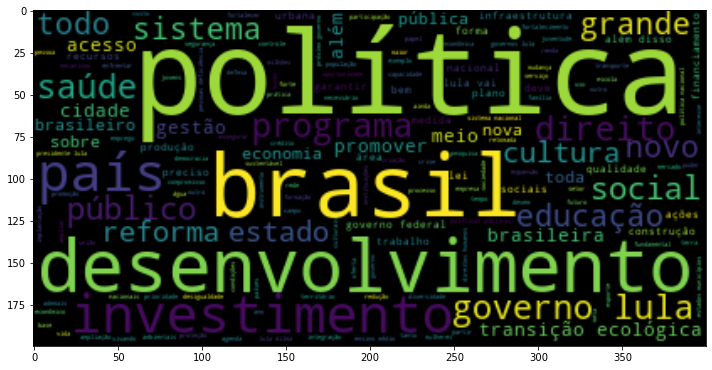

In [17]:
# concatenar os tokens limpos 
tokens_juntos = " ".join(s for s in conteudo_limpo)
wordcloud = WordCloud(background_color="black").generate(tokens_juntos)

# nuvem de palavras
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()

Victor Resende™ <br>
Outubro, 2022